In [52]:
import numpy as np

archivo = "../data/ch_normal_dist.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

numero = []
cgal_ch_2 = []
cgal_ch_graham = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []


with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()
    
    if len(datos) >= 17:
        numero.append(datos[0])
        cgal_ch_2.append([float(d) for d in datos[1:6]])
        cgal_ch_graham.append([float(d) for d in datos[6:11]])
        cpu_manhattan.append([float(d) for d in datos[11:16]])
        cpu_euclidean.append([float(d) for d in datos[16:21]])
        gpu_scan.append([float(d) for d in datos[21:26]])
        cub_flagged.append([float(d) for d in datos[26:31]])
        thrust_scan.append([float(d) for d in datos[31:36]])
        thrust_copy.append([float(d) for d in datos[36:41]])

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Create a dictionary to map the legend labels to their respective colors
color_mapping = {
    'cgal_ch_2': '#1f77b4',    # Azul
    'cgal_ch_graham': '#ff7f0e',    # Naranja
    'cpu_manhattan': '#2ca02c',    # Verde
    'cpu_euclidean': '#d62728',    # Rojo
    'gpu_scan': '#9467bd',    # Púrpura
    'cub_flagged': '#8c564b',    # Marrón
    'thrust_scan': '#e377c2',    # Rosa
    'thrust_copy': '#7f7f7f',    # Gris
    'omp_euclidean': '#bcbd22',    # Verde amarillento
    'omp_manhattan': '#17becf',    # Cian
    'cudachain' : 'black'
}


# Define line styles and markers for better visualization in black and white
line_styles = {
    'gal_ch_2': '-',
    'cgal_ch_graham': '--',
    'cpu_manhattan': '-.',
    'cpu_euclidean': ':',
    'gpu_scan': '-',
    'cub_flagged': '--',
    'thrust_copy': '-.',
    'thrust_scan': ':',
    'omp_euclidean': '-',
    'omp_manhattan': '--',
    'cudachain' : '-'
}

markers = { 'gal_ch_2': 'o',
            'cgal_ch_graham': 's',
            'cpu_manhattan': 'v',
            'cpu_euclidean': '^',
            'gpu_scan': '<',
            'cub_flagged': '>',
            'thrust_copy': 'p',
            'thrust_scan': '*',
            'omp_euclidean' : 'D',
            'omp_manhattan' : '8',
            'cudachain' : 'x'   
}
  
marker_style = {
    #'markerfacecolor': 'none',
    #'markeredgecolor': 'black',
    'markersize': 6
} 


# Normal Distribution

## only filter

In [54]:
archivo = "../data/normal_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        numero.append(int(datos[0]))
        cpu_manhattan.append(float(datos[1]))
        #cpu_euclidean.append(float(datos[6]))
        gpu_scan.append(float(datos[11]))
        cub_flagged.append(float(datos[16]))
        thrust_scan.append(float(datos[21]))
        thrust_copy.append(float(datos[26]))
        
ruta = "../data/omp_euclidean_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/omp_manhattan_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
        
ruta3 = "../data/cpu_euclidean_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta3, "r") as f:
    lineas = f.readlines()
    
cpu_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        cpu_euclidean.append(float(datos[1]))
        

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cpu_euclidean = np.array(cpu_euclidean)
cpu_manhattan = cpu_euclidean / np.array(cpu_manhattan)
gpu_scan = cpu_euclidean / np.array(gpu_scan)
cub_flagged = cpu_euclidean / np.array(cub_flagged)
thrust_scan = cpu_euclidean / np.array(thrust_scan)
thrust_copy = cpu_euclidean / np.array(thrust_copy)
omp_manhattan = cpu_euclidean / np.array(omp_manhattan)
omp_euclidean = cpu_euclidean / np.array(omp_euclidean)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_normal = {
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan
}

# Sort the legend labels based on the maximum value in each array
sorted_labels_normal = sorted(legend_labels_normal, key=lambda x: np.max(legend_labels_normal[x]), reverse=True)

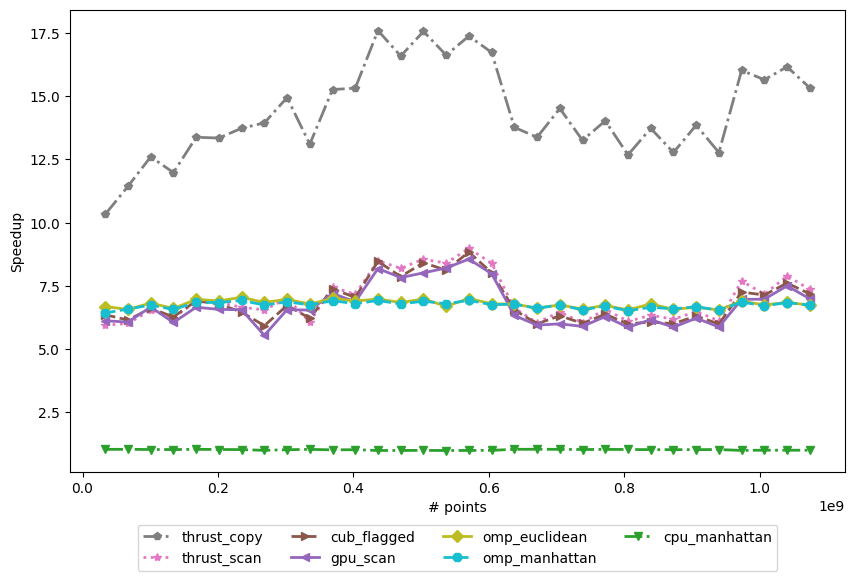

In [55]:
# Plot the arrays in the desired order with distinct line styles and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_normal):
    if label != 'cpu_euclidean':
        plt.plot(numero, legend_labels_normal[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

In [56]:
thrust_copy[len(thrust_copy)-1] / thrust_scan[len(thrust_scan)-1]

2.0812296152544185

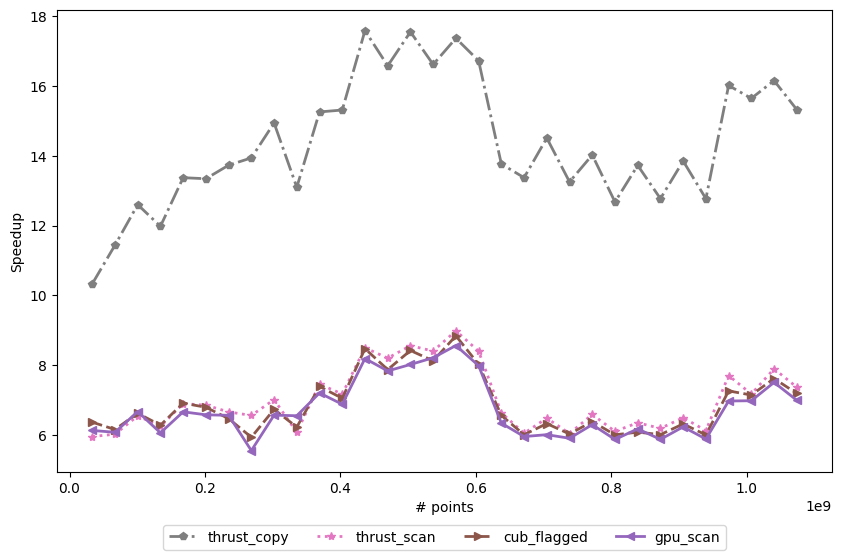

In [57]:
# Plot the arrays in the desired order with distinct line styles and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_normal):
    if label != 'cpu_euclidean' and label != 'omp_euclidean' and label != 'omp_manhattan' and label != 'cpu_manhattan':
        plt.plot(numero, legend_labels_normal[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

## filter + Convex hull

In [58]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/ch_normal_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_ch_graham = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(int(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_ch_graham.append(float(datos[6]))
        cpu_manhattan.append(float(datos[11]))
        #cpu_euclidean.append(float(datos[16]))
        gpu_scan.append(float(datos[21]))
        cub_flagged.append(float(datos[26]))
        thrust_scan.append(float(datos[31]))
        thrust_copy.append(float(datos[36]))
        
ruta = "../data/ch_omp_euclidean_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/ch_omp_manhattan_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
       
ruta3 = "../data/ch_cpu_euclidean_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta3, "r") as f:
    lineas = f.readlines()
     
cpu_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cpu_euclidean.append(float(datos[1]))
        
ruta4 = "../data/ch_cudachain_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta4, "r") as f:
    lineas = f.readlines()
     
cudachain = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        cudachain.append(float(datos[1]))

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cgal_ch_2 = np.array(cgal_ch_2)
cgal_ch_graham = cgal_ch_2 / np.array(cgal_ch_graham)
cpu_manhattan = cgal_ch_2 / np.array(cpu_manhattan)
cpu_euclidean = cgal_ch_2 / np.array(cpu_euclidean)
gpu_scan = cgal_ch_2 / np.array(gpu_scan)
cub_flagged = cgal_ch_2 / np.array(cub_flagged)
thrust_scan = cgal_ch_2 / np.array(thrust_scan)
thrust_copy = cgal_ch_2 / np.array(thrust_copy)
omp_manhattan = cgal_ch_2 / np.array(omp_manhattan)
omp_euclidean = cgal_ch_2 / np.array(omp_euclidean)
cudachain = cgal_ch_2 / np.array(cudachain)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_ch_normal = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_ch_graham': cgal_ch_graham,
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan,
    'cudachain' : cudachain
}         
            
# Sort the legend labels based on the maximum value in each array
sorted_labels_ch_normal = sorted(legend_labels_ch_normal, key=lambda x: np.max(legend_labels_ch_normal[x]), reverse=True)

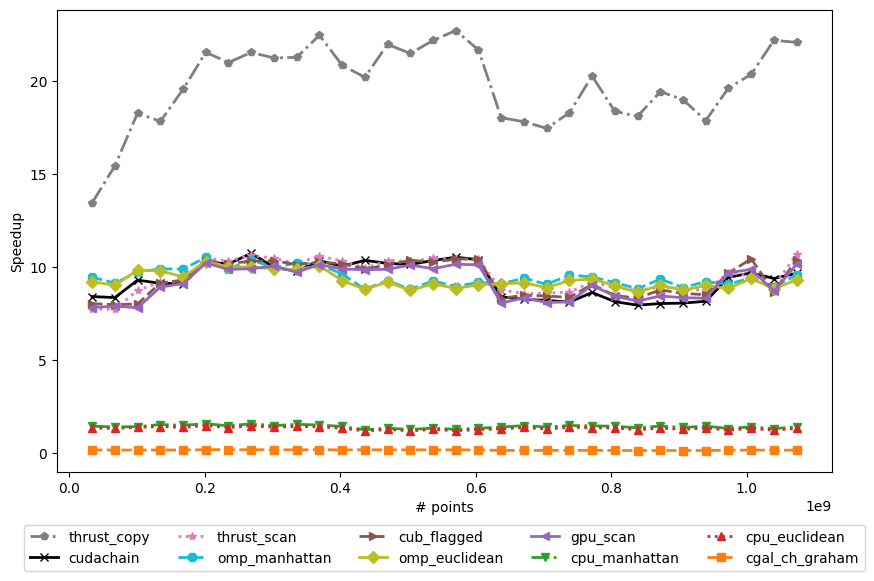

In [59]:
# Plot the arrays in the desired order with distinct line styles and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_normal):
    if label != 'cgal_ch_2':
        plt.plot(numero, legend_labels_ch_normal[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)
plt.show()

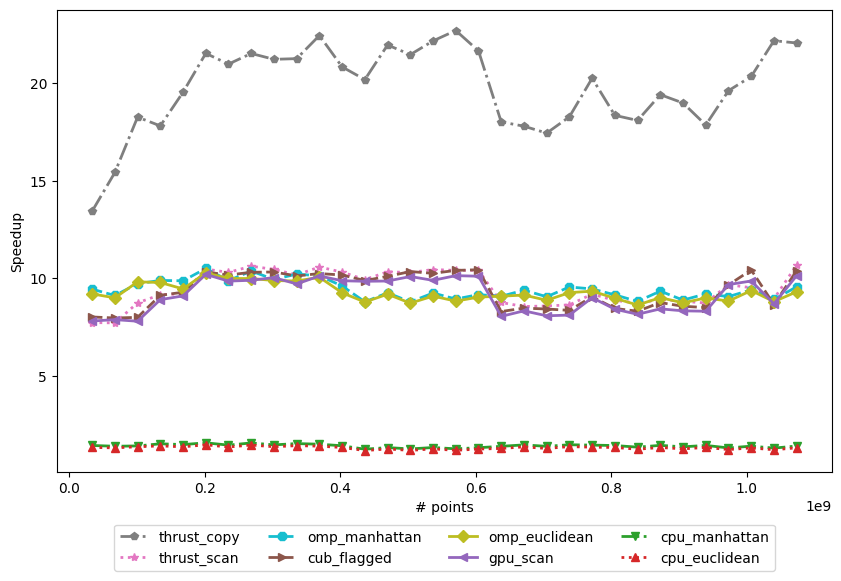

In [60]:
# Plot the arrays in the desired order with segmented lines and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_normal):
    if label != 'cgal_ch_2' and label != 'cgal_ch_graham' and 'cudachain' != label:
        plt.plot(numero, legend_labels_ch_normal[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)

#label != 'omp_euclidean' and label != 'omp_manhattan' and label != 'cpu_manhattan' and label != 'cpu_euclidean' and
plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)  

# save pdf file


plt.show()

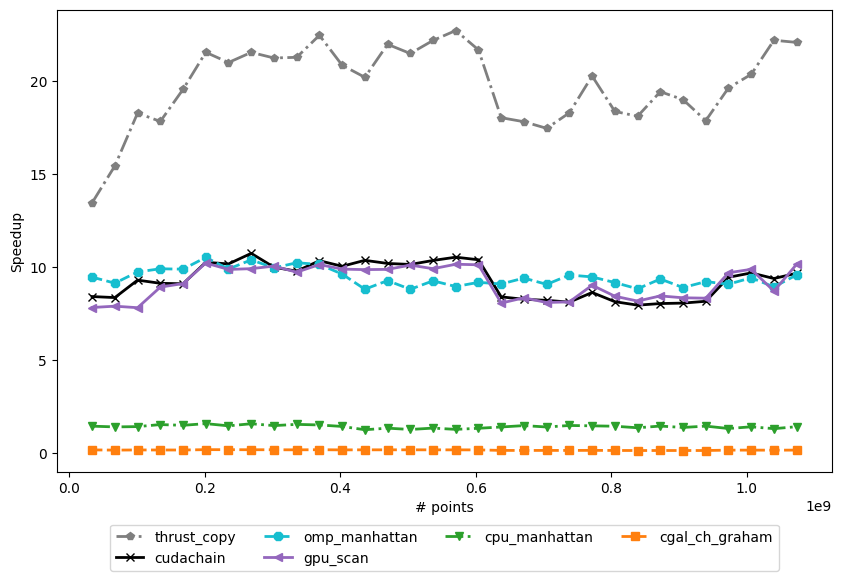

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_normal):
    if label != 'cub_flagged' and label != 'thrust_scan' and label != 'cgal_ch_2' and label != 'cpu_euclidean' and label != 'omp_euclidean':
        plt.plot(numero, legend_labels_ch_normal[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')

# Legend at the bottom of the figure
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()


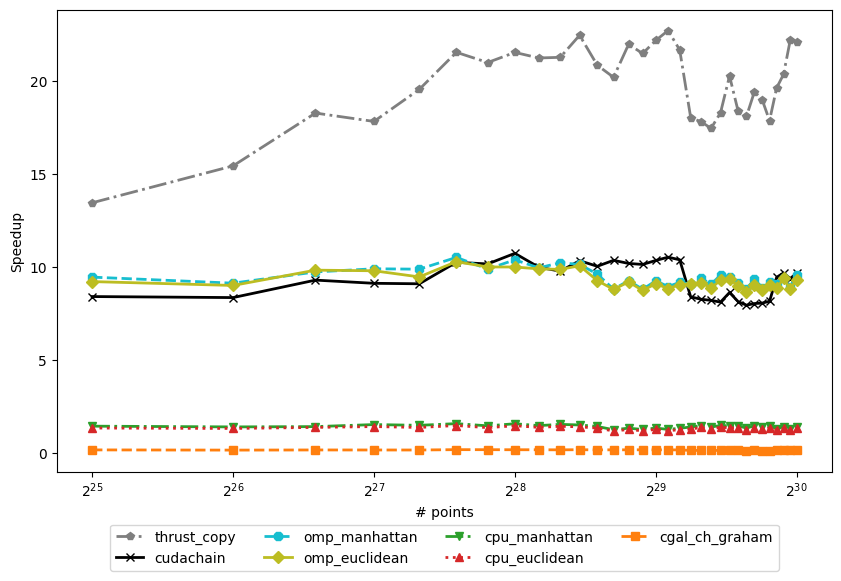

In [62]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_normal):
    if label != 'cub_flagged' and label != 'thrust_scan' and label != 'gpu_scan' and label != 'cgal_ch_2':
        plt.plot(numero, legend_labels_ch_normal[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')

# Legend at the bottom of the figure
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.xscale('log', base=2)

plt.show()


NOTA para el 4to comentatio: cambiar el eje x para que sea potencia de 2, no es bueno porque los puntos estan sampleados linealmente, al dejar el eje x en logaritmico va a confundir al lector ya que deja esos espacio y acumula todo al final

In [106]:
ruta = "../data/omp_euclidean_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_euclidean.append(int(datos[4]))
        
#print (omp_euclidean)

ruta2 = "../data/omp_manhattan_normal.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_manhattan.append(int(datos[4]))
        
#print(omp_euclidean[::6])
#print(omp_manhattan[::6])
#print(numero[::6])

val = 6

import pandas as pd

# Crear un DataFrame con los arreglos
data = {'Numero': numero[::6], 'Euclidean': omp_euclidean[::6], 'Manhattan': omp_manhattan[::6]}
df = pd.DataFrame(data)



# Agregar el paquete tabularx y centrar la tabla
tabla_latex = '\\usepackage{tabularx}\n\n'
tabla_latex = tabla_latex.replace('\\begin{tabular}', '\\begin{tabularx}{\\textwidth}')

# Remover la columna de índices
tabla_latex = tabla_latex.replace('\\begin{tabularx}{\\textwidth}', '\\begin{tabular}{ccc}')
tabla_latex = tabla_latex.replace('\\end{tabularx}', '\\end{tabular}')







# Guardar la tabla en un archivo
#with open('tabla.tex', 'w') as file:
#    file.write(tabla_latex)

# Imprimir la tabla en la consola
print(tabla_latex)

\usepackage{tabularx}

\begin{tabular}{ccc}{rrr}
\toprule
Numero & Euclidean & Manhattan \\
\midrule
33554432 & 135 & 143 \\
234881024 & 122 & 191 \\
436207616 & 164 & 145 \\
637534208 & 311 & 776 \\
838860800 & 336 & 929 \\
1040187392 & 260 & 122 \\
\bottomrule
\end{tabular}



# Uniform Distribution

## Only filter

In [63]:
archivo = "../data/uniform_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        numero.append(int(datos[0]))
        cpu_manhattan.append(float(datos[1]))
        #cpu_euclidean.append(float(datos[6]))
        gpu_scan.append(float(datos[11]))
        cub_flagged.append(float(datos[16]))
        thrust_scan.append(float(datos[21]))
        thrust_copy.append(float(datos[26]))
        
ruta = "../data/omp_euclidean_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/omp_manhattan_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
        
ruta3 = "../data/cpu_euclidean_uniform.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta3, "r") as f:
    lineas = f.readlines()
    
cpu_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        cpu_euclidean.append(float(datos[1]))
        

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cpu_euclidean = np.array(cpu_euclidean)
cpu_manhattan = cpu_euclidean / np.array(cpu_manhattan)
gpu_scan = cpu_euclidean / np.array(gpu_scan)
cub_flagged = cpu_euclidean / np.array(cub_flagged)
thrust_scan = cpu_euclidean / np.array(thrust_scan)
thrust_copy = cpu_euclidean / np.array(thrust_copy)
omp_manhattan = cpu_euclidean / np.array(omp_manhattan)
omp_euclidean = cpu_euclidean / np.array(omp_euclidean)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_uniform = {
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan
}

# Sort the legend labels based on the maximum value in each array
sorted_labels_uniform = sorted(legend_labels_normal, key=lambda x: np.max(legend_labels_normal[x]), reverse=True)

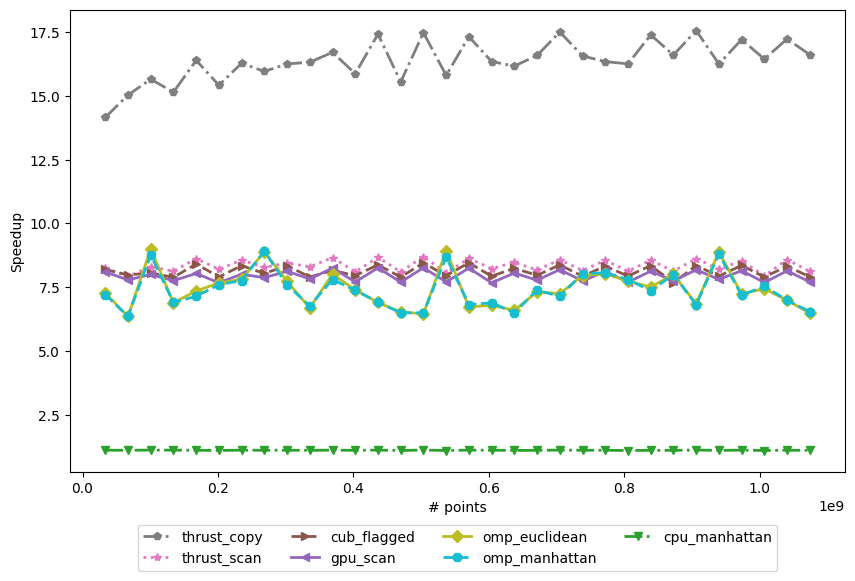

In [64]:
# Plot the arrays in the desired order with distinct line styles and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_uniform):
    if label != 'cpu_euclidean':
        plt.plot(numero, legend_labels_uniform[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

## Filter + Convex Hull

# Circumference Distribution

## Filter

In [65]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/circumference_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        numero.append(int(datos[0]))
        cpu_manhattan.append(float(datos[1]))
        cpu_euclidean.append(float(datos[6]))
        gpu_scan.append(float(datos[11]))
        cub_flagged.append(float(datos[16]))
        thrust_scan.append(float(datos[21]))
        thrust_copy.append(float(datos[26]))
        
ruta = "../data/omp_euclidean_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/omp_manhattan_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 1:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
        

# Convert lists to numpy arrays for easier manipulation
numero = np.array(numero)
cpu_euclidean = np.array(cpu_euclidean)
cpu_manhattan = cpu_euclidean / np.array(cpu_manhattan)
gpu_scan = cpu_euclidean / np.array(gpu_scan)
cub_flagged = cpu_euclidean / np.array(cub_flagged)
thrust_scan = cpu_euclidean / np.array(thrust_scan)
thrust_copy = cpu_euclidean / np.array(thrust_copy)
omp_manhattan = cpu_euclidean / np.array(omp_manhattan)
omp_euclidean = cpu_euclidean / np.array(omp_euclidean)

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_circumference = {
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan
}


# Sort the legend labels based on the maximum value in each array
sorted_labels_circumference = sorted(legend_labels_circumference, key=lambda x: np.max(legend_labels_circumference[x]), reverse=True)

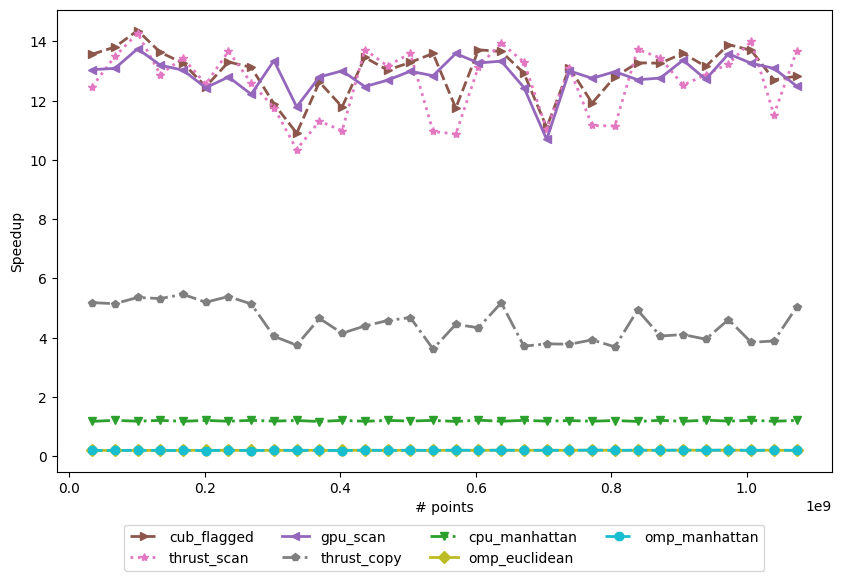

In [66]:
# Plot the arrays in the desired order with distinct line styles and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_circumference):
    if label != 'cpu_euclidean':
        plt.plot(numero, legend_labels_circumference[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)
plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

In [67]:
thrust_scan[len(thrust_scan)-1] / thrust_copy[len(thrust_copy)-1]

2.713717560466276

## Filter + Convex Hull

In [68]:
import numpy as np
import matplotlib.pyplot as plt

archivo = "../data/ch_circumference_dist.dat"  # Replace "ruta_del_archivo.txt" with the actual file path

numero = []
cgal_ch_2 = []
cgal_ch_graham = []
cpu_manhattan = []
cpu_euclidean = []
gpu_scan = []
cub_flagged = []
thrust_scan = []
thrust_copy = []

with open(archivo, "r") as f:
    lineas = f.readlines()

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 17:
        numero.append(int(datos[0]))
        cgal_ch_2.append(float(datos[1]))
        cgal_ch_graham.append(float(datos[6]))
        cpu_manhattan.append(float(datos[11]))
        cpu_euclidean.append(float(datos[16]))
        gpu_scan.append(float(datos[21]))
        cub_flagged.append(float(datos[26]))
        thrust_scan.append(float(datos[31]))
        thrust_copy.append(float(datos[36]))
        
ruta = "../data/ch_omp_euclidean_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta, "r") as f:
    lineas = f.readlines()
    
omp_euclidean = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_euclidean.append(float(datos[1]))
        
#print (omp_euclidean)

ruta2 = "../data/ch_omp_manhattan_sphere.dat"  # Reemplaza "ruta_del_archivo.txt" con la ruta real del archivo

with open(ruta2, "r") as f:
    lineas = f.readlines()
    
omp_manhattan = []

for linea in lineas:
    datos = linea.strip().split()

    if len(datos) >= 6:
        #numero.append(int(datos[0]))
        omp_manhattan.append(float(datos[1]))
        

# Convert lists to numpy arrays for easier manipulation
numero_circumference = np.array(numero[:-2])
cgal_ch_2 = np.array(cgal_ch_2[:-2])
cgal_ch_graham = cgal_ch_2 / np.array(cgal_ch_graham[:-2])
cpu_manhattan = cgal_ch_2 / np.array(cpu_manhattan[:-2])
cpu_euclidean = cgal_ch_2 / np.array(cpu_euclidean[:-2])
gpu_scan = cgal_ch_2 / np.array(gpu_scan[:-2])
cub_flagged = cgal_ch_2 / np.array(cub_flagged[:-2])
thrust_scan = cgal_ch_2 / np.array(thrust_scan[:-2])
thrust_copy = cgal_ch_2 / np.array(thrust_copy[:-2])
omp_manhattan = cgal_ch_2 / np.array(omp_manhattan[:-2])
omp_euclidean = cgal_ch_2 / np.array(omp_euclidean[:-2])

# Create a dictionary to map the legend labels to their respective arrays
legend_labels_ch_circumference = {
    'cgal_ch_2': cgal_ch_2,
    'cgal_ch_graham': cgal_ch_graham,
    'cpu_manhattan': cpu_manhattan,
    'cpu_euclidean': cpu_euclidean,
    'gpu_scan': gpu_scan,
    'cub_flagged': cub_flagged,
    'thrust_scan': thrust_scan,
    'thrust_copy': thrust_copy,
    'omp_euclidean' : omp_euclidean,
    'omp_manhattan' : omp_manhattan
}

# Create a dictionary to map the legend labels to their respective colors
color_mapping = {
    'cgal_ch_2': 'tab:blue',
    'cgal_ch_graham': 'tab:orange',
    'cpu_manhattan': 'tab:green',
    'cpu_euclidean': 'tab:red',
    'gpu_scan': 'tab:purple',
    'cub_flagged': 'tab:brown',
    'thrust_scan': 'tab:pink',
    'thrust_copy': 'tab:gray',
    'omp_euclidean' : 'tab:olive',
    'omp_manhattan' : 'tab:cyan'
}


# Sort the legend labels based on the maximum value in each array
sorted_labels_ch_circumference = sorted(legend_labels_ch_circumference, key=lambda x: np.max(legend_labels_ch_circumference[x]), reverse=True)

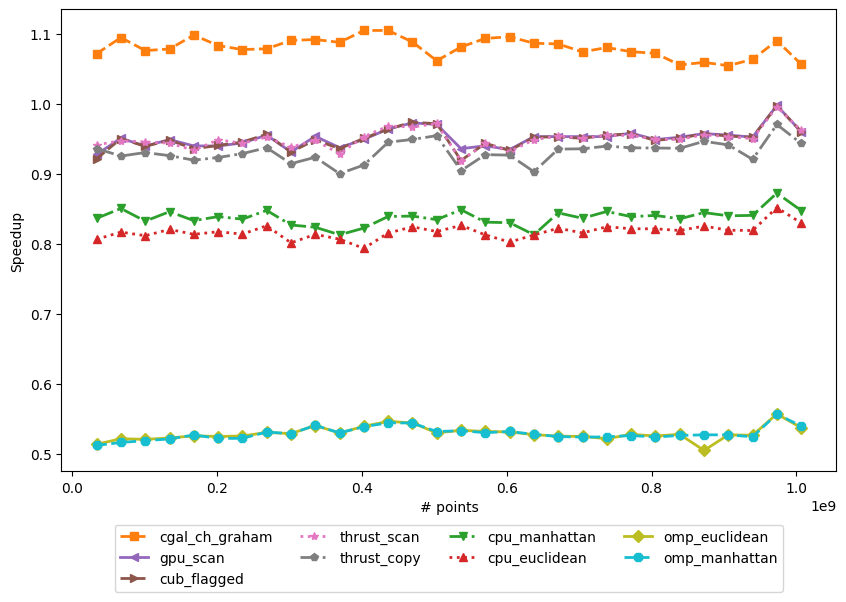

In [69]:
# Plot the arrays in the desired order with distinct line styles and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_circumference):
    if label != 'cgal_ch_2':
        plt.plot(numero_circumference, legend_labels_ch_circumference[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

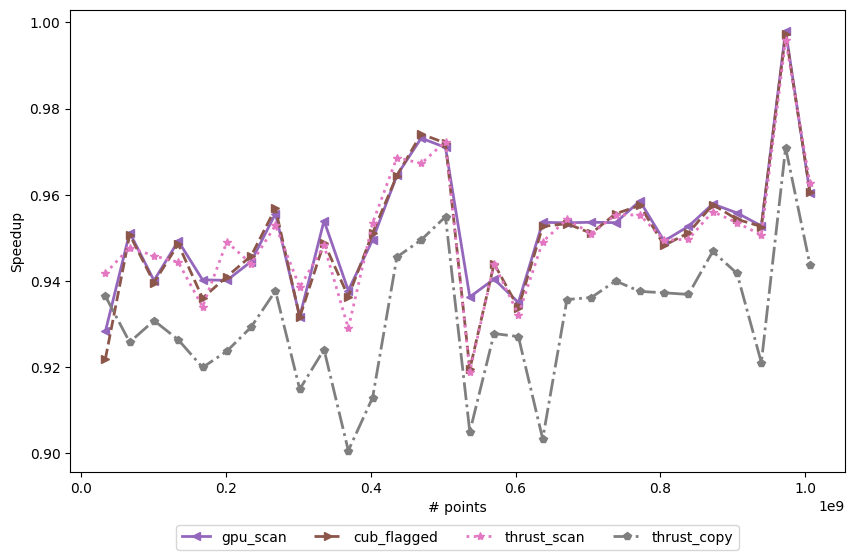

In [70]:
# Plot the arrays in the desired order with segmented lines and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_circumference):
    if label != 'omp_euclidean' and label != 'omp_manhattan' and label != 'cgal_ch_2' and label != 'cgal_ch_graham' and label != 'cpu_manhattan' and label != 'cpu_euclidean':
        plt.plot(numero_circumference, legend_labels_ch_circumference[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')
#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

plt.show()

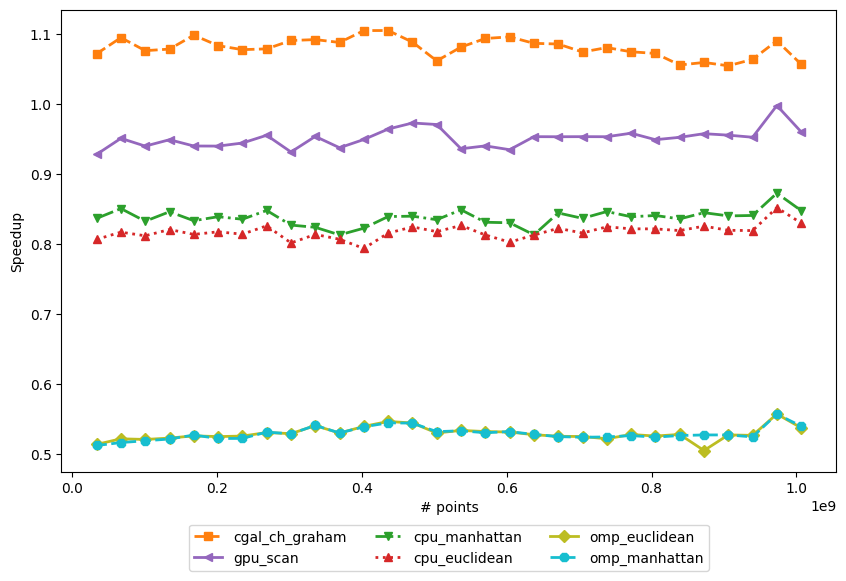

In [71]:
# Plot the arrays in the desired order with segmented lines and markers
plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_ch_circumference):
    if label != 'cub_flagged' and label != 'thrust_scan' and label != 'thrust_copy' and label != 'cgal_ch_2':
        plt.plot(numero_circumference, legend_labels_ch_circumference[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)

plt.xlabel('# points')
plt.ylabel('Speedup')
#plt.yscale('log')

# legend abajo de toda la figura
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=3)

#plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.show()

In [72]:
thrust_copy[len(thrust_copy)-1] / thrust_scan[len(thrust_scan)-1]

0.9804036530637544

# Subplots

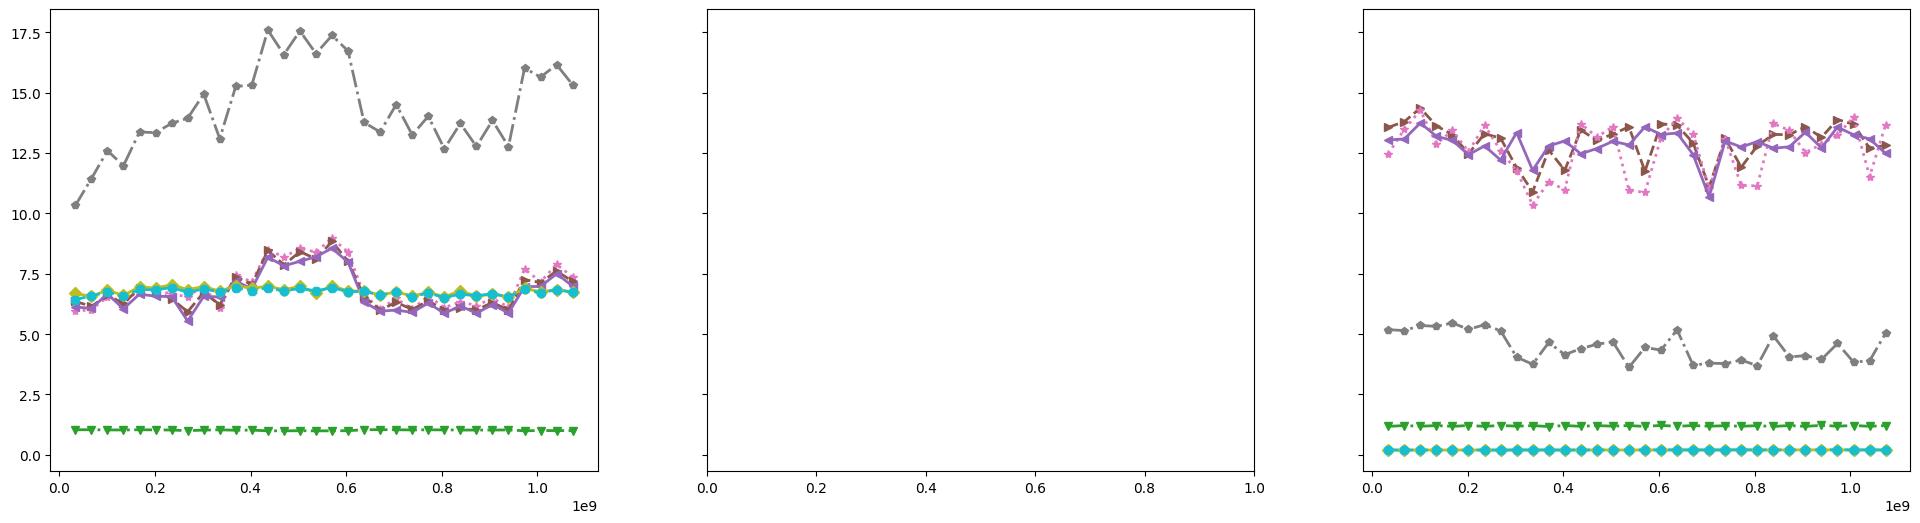

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_normal):
    if label != 'cpu_euclidean':
        axes[0].plot(numero, legend_labels_normal[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_circumference):
    if label != 'cpu_euclidean':
        axes[2].plot(numero, legend_labels_circumference[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)
        
plt.show()


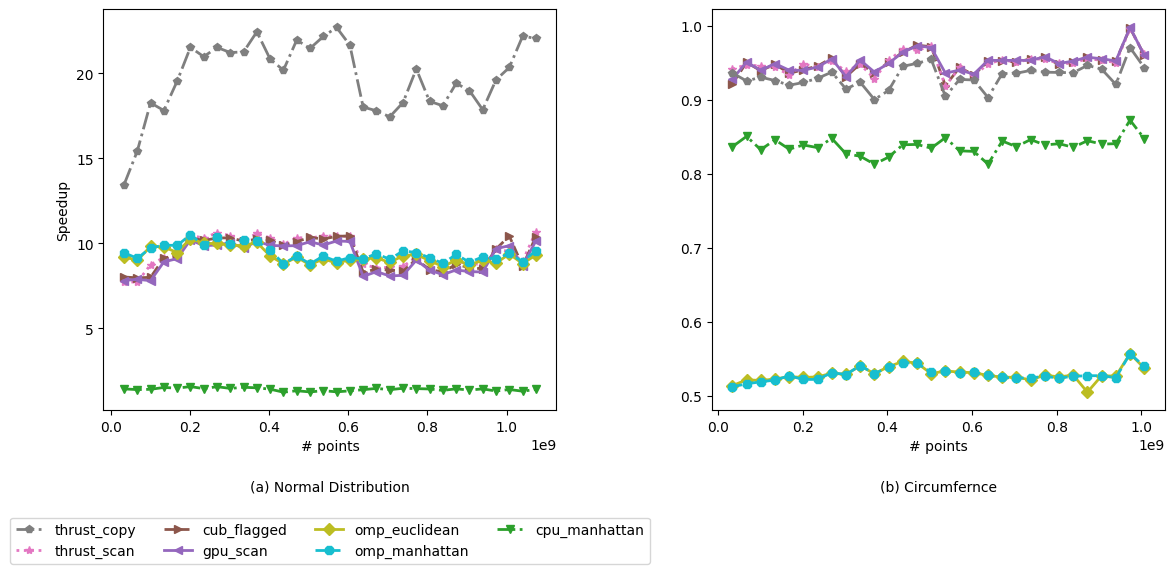

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_normal):
    if label != 'cpu_euclidean':
        axes[0].plot(numero, legend_labels_ch_normal[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_circumference):
    if label != 'cpu_euclidean':
        axes[1].plot(numero_circumference, legend_labels_ch_circumference[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)
        
axes[0].legend(bbox_to_anchor=(0.5, -0.25), loc='upper center', ncol=4)

axes[0].set_xlabel('# points')
axes[1].set_xlabel('# points')
axes[0].set_ylabel('Speedup')

axes[0].text(0.5, -0.2, "(a) Normal Distribution", ha='center', transform=axes[0].transAxes)
axes[1].text(0.5, -0.2, "(b) Circumfernce", ha='center', transform=axes[1].transAxes)

plt.tight_layout()

plt.show()

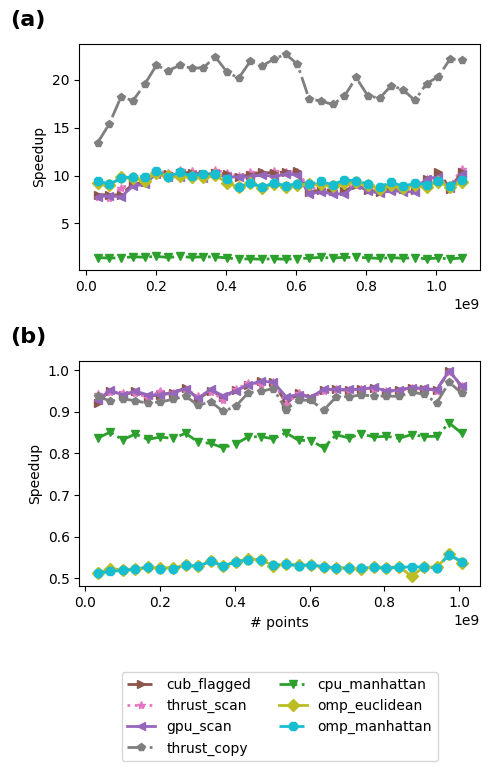

In [75]:
fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharey=False)


# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_normal):
    if label != 'cpu_euclidean':
        axes[0].plot(numero, legend_labels_ch_normal[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)

# Plot the arrays in the desired order with distinct line styles and markers
#plt.figure(figsize=(10, 6))
for i, label in enumerate(sorted_labels_circumference):
    if label != 'cpu_euclidean':
        axes[1].plot(numero_circumference, legend_labels_ch_circumference[label], label=label, color=color_mapping[label], linewidth=2,
                linestyle=line_styles[label], marker=markers[label], **marker_style)
        
letras = ['(a)', '(b)', '(c)']
for i, ax in enumerate(axes):
    ax.annotate(letras[i], xy=(0, 1), xytext=(-50, 10), fontsize=16, fontweight='bold',
                xycoords='axes fraction', textcoords='offset points', ha='left', va='bottom')



        
axes[1].legend(bbox_to_anchor=(0.5, -0.35), loc='upper center', ncol=2)

axes[1].set_xlabel('# points')
axes[1].set_ylabel('Speedup')
axes[0].set_ylabel('Speedup')

#axes[0].text(0.5, -0.25, "(a) Normal Distribution", ha='center', transform=axes[0].transAxes)
#axes[1].text(0.5, -0.25, "(b) Circumfernce", ha='center', transform=axes[1].transAxes)

plt.tight_layout()

plt.show()